## This script performs an exploratory data analysis (EDA) on a dataset containing patient reviews of various birth control drugs. The script provides graphs and tables to visualize trends with certain birth control drugs. The script focuses on the top 10 most reviewed drugs.

In [8]:
# importing the dataset
import pandas as pd
data = pd.read_csv('/content/sentimentdf.csv')
print(data)

                                              review.tm  Unnamed..0  \
0     able use oral contraceptives containing estrog...         346   
1     abnormal bleeding month long severe mood swing...      148259   
2     absolute hell word go disgusting side effects ...      148980   
3     absolute nightmare ive nexplanon arm months iv...      144252   
4     absolute nightmare ive nexplanon arm months iv...      109969   
...                                                 ...         ...   
9643  zarah years recently began ovulating pill doct...       10618   
9644  zovia months now great acne unplanned pregnanc...       95759   
9645  zovia months quickly gained pounds even though...       57500   
9646  zovia years always took time never side effect...       80638   
9647  zovia years experience great rating however ma...       57441   

                            drugName      condition  \
0                Medroxyprogesterone  Birth Control   
1                      Norethindrone 

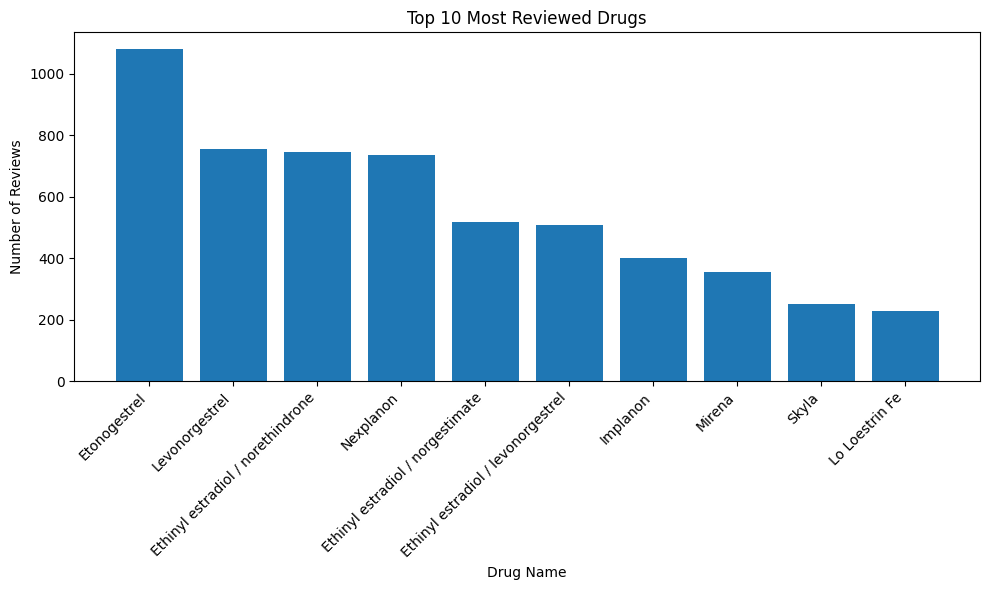

In [18]:
# creating a bar graph of the top 10 most reviewed drugs

import matplotlib.pyplot as plt

# Counting the number of reviews for each drug
drug_counts = data['drugName'].value_counts()

# Selecting the top 10 most reviewed drugs
top_10_drugs = drug_counts.head(10)

plt.figure(figsize=(10, 6))

# Creating a bar plot of the top 10 most reviewed drugs
plt.bar(top_10_drugs.index, top_10_drugs.values)
plt.xlabel('Drug Name')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Most Reviewed Drugs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

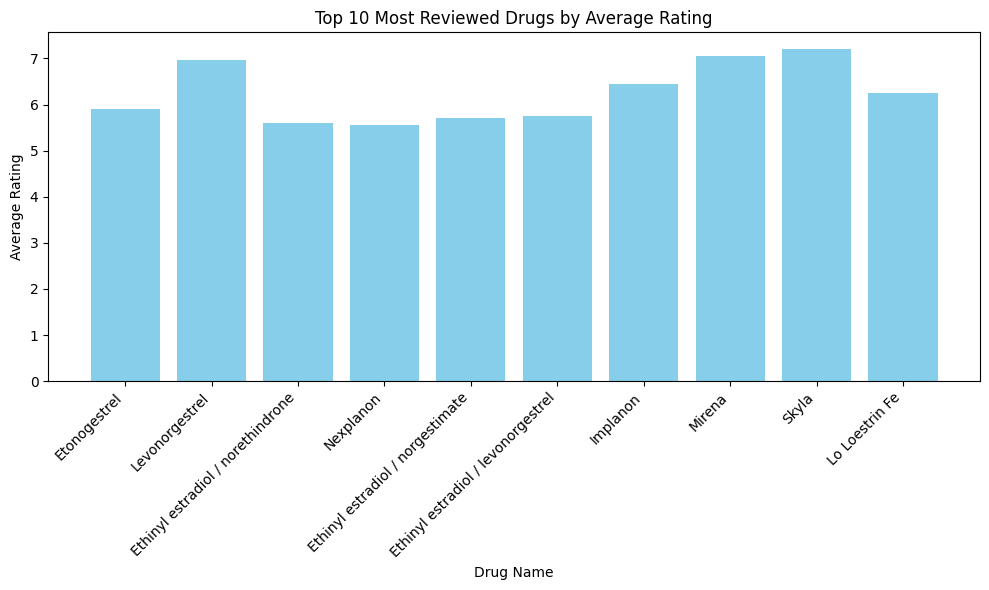

In [20]:
# Creating a bar graph of the top 10 most reviewed and their average rating from patients/users
import pandas as pd
import matplotlib.pyplot as plt

drug_counts = data['drugName'].value_counts()
top_10_drugs = drug_counts.head(10)

# Finding the average rating for these top 10 most reviewed drugs
average_ratings = data[data['drugName'].isin(top_10_drugs.index)].groupby('drugName')['rating'].mean()

# Sort the average ratings to match the order of top_10_drugs
sorted_average_ratings = average_ratings.loc[top_10_drugs.index]

# Creating the bar graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_average_ratings.index, sorted_average_ratings.values, color='skyblue')  # You can choose a color
plt.xlabel('Drug Name')
plt.ylabel('Average Rating')
plt.title('Top 10 Most Reviewed Drugs by Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
# Creating a table of the top 10 most reviewed drugs and their average rating

table_data = pd.DataFrame({'Drug Name': top_10_drugs.index, 'Average Rating': average_ratings})
print(table_data)

                                                             Drug Name  \
drugName                                                                 
Ethinyl estradiol / levonorgestrel                        Etonogestrel   
Ethinyl estradiol / norethindrone                       Levonorgestrel   
Ethinyl estradiol / norgestimate     Ethinyl estradiol / norethindrone   
Etonogestrel                                                 Nexplanon   
Implanon                              Ethinyl estradiol / norgestimate   
Levonorgestrel                      Ethinyl estradiol / levonorgestrel   
Lo Loestrin Fe                                                Implanon   
Mirena                                                          Mirena   
Nexplanon                                                        Skyla   
Skyla                                                   Lo Loestrin Fe   

                                    Average Rating  
drugName                                            
Ethin

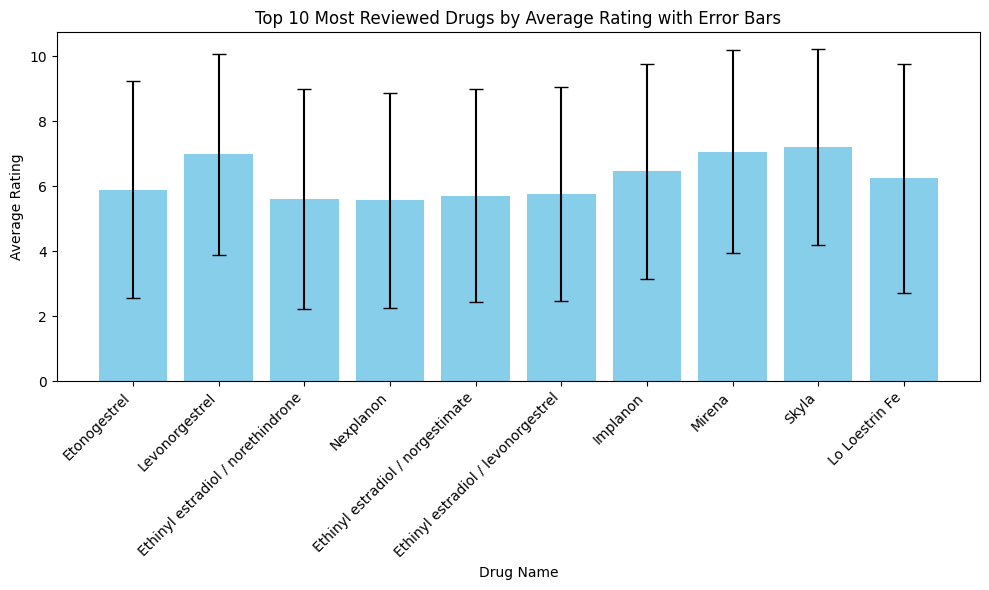

In [23]:
# Finding the average rating and standard deviation for these top 10 most reviewed drugs
stats = data[data['drugName'].isin(top_10_drugs.index)].groupby('drugName')['rating'].agg(['mean', 'std'])

# Sort the stats to match the order of top_10_drugs
sorted_stats = stats.loc[top_10_drugs.index]

# Creating the graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_stats.index, sorted_stats['mean'], yerr=sorted_stats['std'], color='skyblue', capsize=5)  # Added error bars
plt.xlabel('Drug Name')
plt.ylabel('Average Rating')
plt.title('Top 10 Most Reviewed Drugs by Average Rating with Error Bars')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


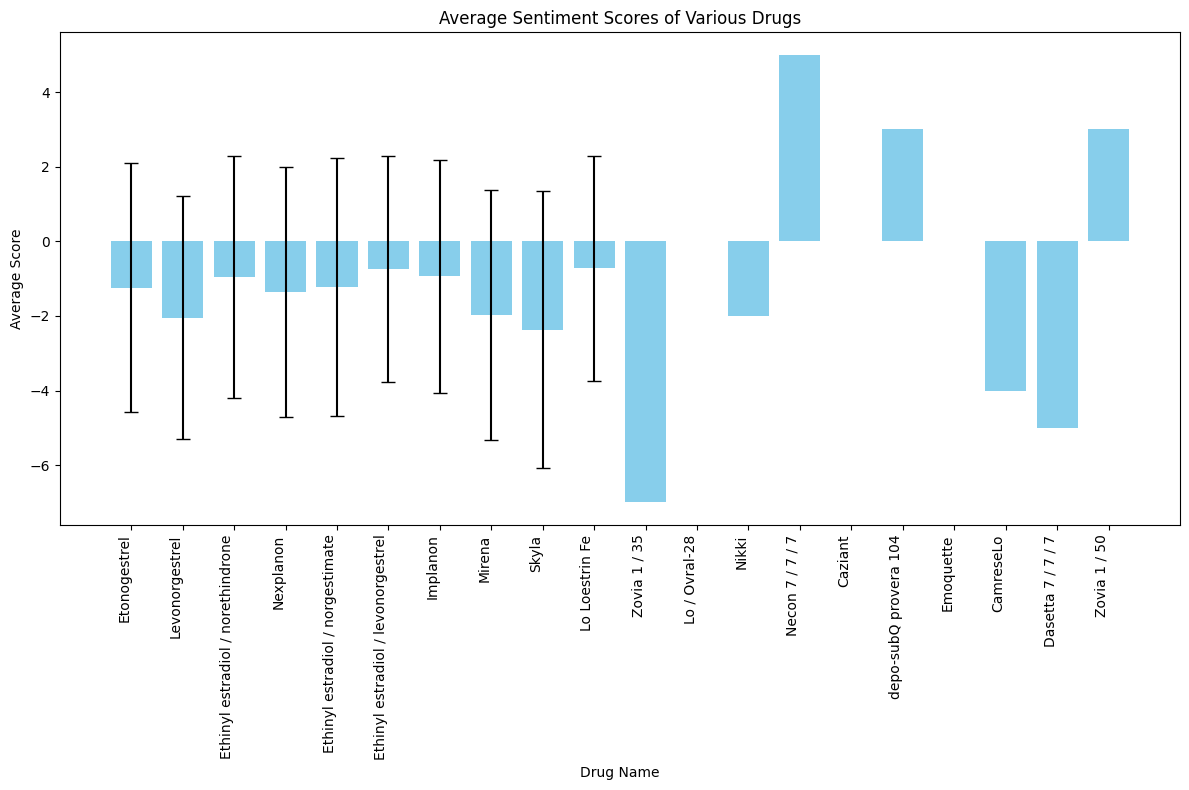

In [24]:
# Finding the top 10 least reviewed drugs
least_10_drugs = drug_counts.tail(10)  # This fetches the 10 least reviewed drugs

# Combining the most and least frequent drugs
top_least_drugs = pd.concat([top_10_drugs, least_10_drugs])

# Finding the average rating and standard deviation for these drugs
stats = data[data['drugName'].isin(top_least_drugs.index)].groupby('drugName')['score'].agg(['mean', 'std'])

# Sort the stats to match the order of combined drugs
sorted_stats = stats.loc[top_least_drugs.index]

# Creating the graph
plt.figure(figsize=(12, 8))  # Adjusted figure size for better visibility
plt.bar(sorted_stats.index, sorted_stats['mean'], yerr=sorted_stats['std'], color='skyblue', capsize=5)
plt.xlabel('Drug Name')
plt.ylabel('Average Score')
plt.title('Average Sentiment Scores of Various Drugs')
plt.xticks(rotation=90, ha='right')  # Rotated for better readability of drug names
plt.tight_layout()
plt.show()


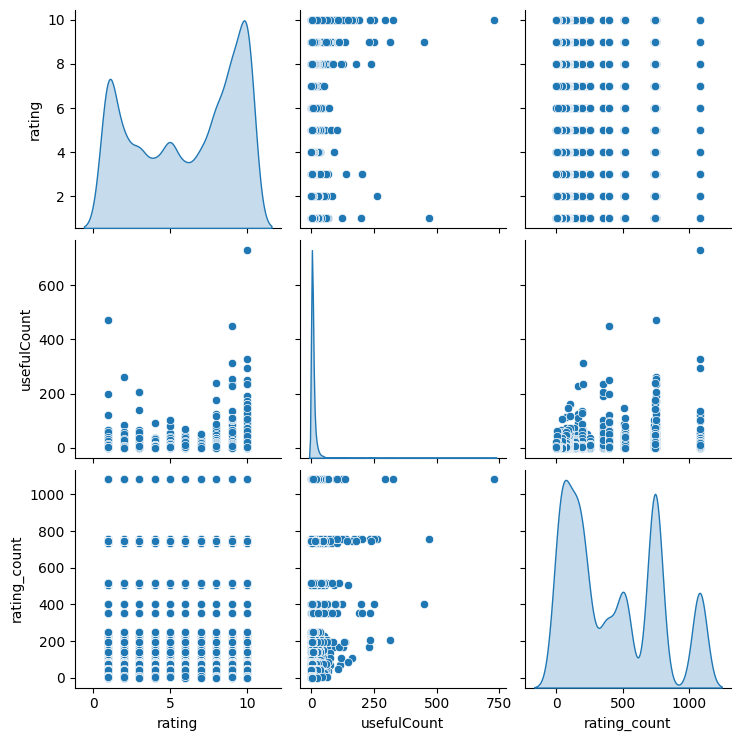

In [25]:
# Creating a scatterplot matrix of sentiment score, patient rating, and number of reviews

# Calculating the number of reviews for each drug
review_counts = data.groupby('drugName')['rating'].count()

# Merge review counts with the original DataFrame
data_with_review_counts = data.merge(review_counts, on='drugName', suffixes=('', '_count'))

# Select the columns we want to explore
selected_data = data_with_review_counts[['rating', 'usefulCount', 'rating_count']]

# Create a scatterplot matrix
sns.pairplot(selected_data, kind='scatter', diag_kind='kde')
plt.show()
